Objective
The titanic dataset contains the information about people travelling in the ship. The information about who survived
is also provided. It is interesting to find out the factors which might be responsible for the survival of people.

I am interested in finding out if people who paid more for the tickets(traveling in class 1) had a more 
number of survivors.

It is also important to note what percentage of survivors are women and children.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic_pd = pd.read_csv('titanic-data.csv')

Importing numpy, pandas and seaborn for later use during the process.
CSV file is read and stored as a dataframe in titanic_pd.

In [2]:
# Just having a look at the data.
titanic_pd.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# We would like to have an overview of the data variables. 
# The following command gives the statistics for all the variables.
titanic_pd.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Mean,Min,Max doesn't make sense for all the variables.
From the above table it is visible that the count for age is less than the total count for people. 
Thus, there are some missing values for age variable.

I will see how count of survivors vary with 'Age', 'Sex' and 'Fare' variable.

In [4]:
# Looking into the data we find that there are missing values for the 'Age' variable.
# So we would remove those values. 
titanic_pd_clean = titanic_pd[np.isfinite(titanic_pd['Age'])]

In [5]:
# Since we are interested only in the following variables, we will reduce the size of dataset.
reduced_set = titanic_pd_clean[['Survived', 'Age', 'Sex', 'Pclass']]

The entire dataframe is squeezed into a smaller dataframe with values from the variables of interest.

In [6]:
# Following command gives the first few observations in the dataframe.
reduced_set.head(5)

,Survived,Age,Sex,Pclass
0,0,22.0,male,3
1,1,38.0,female,1
2,1,26.0,female,3
3,1,35.0,female,1
4,0,35.0,male,3


In [7]:
# We want to analyze the values for Survived variable, therefore the dataframe is grouped by survived variable.
group_acc_survived = reduced_set.groupby('Survived')

We will see how the values of 'Age', 'Sex' and 'Fare' vary in the groups.

In [8]:
# After grouping the observations according to the 'Survived' variable, we would see how many observations
# each class of the variable.
group_acc_survived.size()

Survived
0    424
1    290
dtype: int64

The size of groups is visible. Number of people who died is more than survivors.

The chart above shows that the number of survivors were less than the number of people who died.

In [9]:
# The mean values of the values in each variable will help us to have an estimate of the distribution.
group_acc_survived.mean()

,Age,Pclass
Survived,,
0,30.626179,2.485849
1,28.343690,1.872414


This table tells us that the mean age of survivors was less than the mean age of poeple who died. It can be possible 
that the number of children in the survivors is reducing the mean age of the survived people group.
Since the mean Pclass of survived class of people is lower than the mean of the class of people who died, 
there is a possibilty that the number of rich people, who were capable of buying tickets of higher classes 
were more in the survivors. Although taking the mean value of Pclass is not a good estimate for that finding, we will
again look into this variable separately.
The barcharts below shows the same effect.

Populating the interactive namespace from numpy and matplotlib


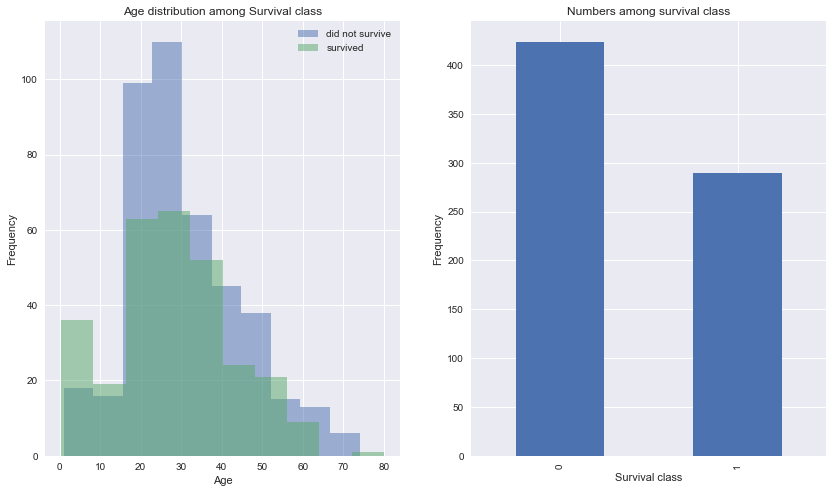

In [10]:
import matplotlib.pyplot as plt
%pylab inline
plt.figure(figsize = (14, 8))
plt.subplot(1, 2, 1)
reduced_set.groupby('Survived')['Age'].plot(kind = 'hist', alpha = 0.5)
plt.xlabel('Age')
plt.title('Age distribution among Survival class')
plt.legend(['did not survive','survived']);

plt.subplot(1, 2, 2)
reduced_set.groupby('Survived').count()['Pclass'].plot(kind = 'bar')
plt.xlabel('Survival class')
plt.title('Numbers among survival class')
plt.ylabel('Frequency')


The above barcharts clearly show mean age is lower for survivors in comparison with the people who did not survive.
Also an important thing to note is that the number of people dying with class 1 ticket is much lowe than the
the number of people dying with class 2 and 3 ticket.
On the other hand, number of people who survived are majority with class 1 ticket.
therefore we can say that people who were rich had a better survival rate than the ones who were not so rich.

We would like to see how number of survivors vary in different age groups.
The barchart below shows the distribution of number of survivors and people who died.

C:\Users\abhishek\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


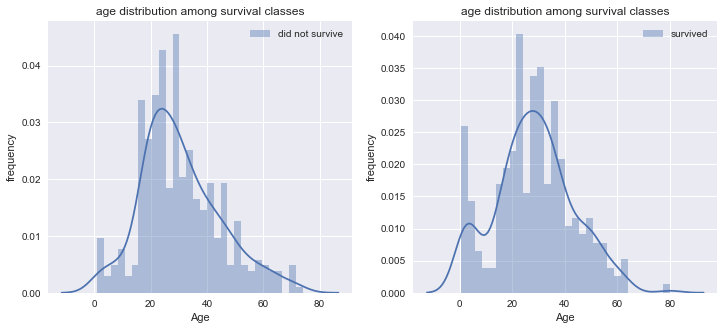

In [11]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.distplot(titanic_pd_clean.loc[(titanic_pd_clean['Survived']==0) & (~titanic_pd_clean['Age'].isnull()),'Age'], bins=30)
plt.title('age distribution among survival classes')
plt.ylabel('frequency')
plt.legend(['did not survive']);

plt.subplot(1, 2, 2)
sns.distplot(titanic_pd_clean.loc[(titanic_pd_clean['Survived']==1) & (~titanic_pd_clean['Age'].isnull()),'Age'], bins=30)
plt.title('age distribution among survival classes')
plt.ylabel('frequency')
plt.legend(['survived']);

The above bargraph shows a peak in the survived class for age around 5years. We will further explore this phenomena.

In [12]:
# We want to see that how many children survived to understand if there was any preference for them or not.
# So we will find out how many children are there in the entire dataset.
# The threshold age for children is taken to be 5 as we see a spike in the data around age 5.
# With this we will get an idea if children were given any preference or not.
# We could have taken any other age threshold for considering children but this age will age also will give a 
# fair idea of a general trend.
children_total = titanic_pd_clean.loc[lambda titanic_pd_clean: titanic_pd_clean.Age < 5]

In [13]:
# We want to know the size of each class in the groupng done according to Survival Variable to get the survival rates.
survived_class_size = group_acc_survived.size()

In [14]:
# Similarly, we want to know the size of each class in the grouping done for children to get the survival rates.
children_total.groupby('Survived').size()

Survived
0    13
1    27
dtype: int64

In [15]:
children_survived = children_total.groupby('Survived').size()

 There are 40 children in the ship out of whom 27 survived. The percentage of survival in children is more than 65%.
 Out of 891 people in total 40 are children. Rest 851 are adults. if we subtract number of children survivors from
 survivors we will get the number of adult survivors which comes to be 315.

In [16]:
# Adult survival ratio is the ratio of the total adults survived to the total number of adults in the ship.
adult_survival_ratio = float((survived_class_size[1] - children_survived[1])/(len(titanic_pd_clean) - len(children_total))) 

In [17]:
adult_survival_ratio

0.39020771513353114

In [18]:
# Child survival ratio is the ratio of the total children survived to the total number of children in the ship.
child_survival_ratio =  children_survived[1] / len(children_total)

In [19]:
child_survival_ratio

0.67500000000000004

 Since the children survival ratio is more, we can say that this affect the mean age of survivors which came
 out to be less than the mean age of people who died. Thus, we think that there is probability that children were 
 given the preference over adults. But this is just a finding not backed by tests on the results. 

In [20]:
children_total.groupby('Sex').sum()['Survived']

Sex
female    12
male      15
Name: Survived, dtype: int64

In [21]:
# We have taken into consideration the age as 18 years for adults. We want to see the variation of males and females
# survival classes in adults.
adults_total = reduced_set.loc[lambda reduced_set: reduced_set.Age >= 5]

# We don't have to confuse the age taken for adults for this analysis with analysis we did for adults taken for adult
# survival ratio. This is beacuse there we are trying to see a pattern in the survival class of children and then we 
# subtract the number of children from the total survivors.
# Here we have taken the number of adults from the age of people greater than equal to 5 although it does not mean 
# that we are considering someone with age 10 as adult. It's just for the sake of uniformity and to look into patterns.

In [22]:
adults_total.groupby('Sex').sum()

,Survived,Age,Pclass
Sex,,,
female,185,7244.5,494
male,78,13870.5,1001


The number of males and females children who survived is almost the same. But the number of adult females 
who survived is almost three times the number of males who survived. This is visible through the above two tables.
Thus, we see that probably adult females were given a preference over adult males. But this is also just a finding 
which is not supported by the any tests on the results.

In [23]:
# We made another group based on the ticket class passengers are traveling in.
# we are more interested to find out of there was any preference given to the people traveling in class 1
group_acc_pclass = titanic_pd.loc[lambda titanic_pd: titanic_pd.Pclass == 1]

In [24]:
# This command gives the size of the people traveling in class 1
len(group_acc_pclass)

216

In [25]:
# Total number of people who survived in this group.
group_acc_pclass['Survived'].sum()

136

In [26]:
# Survival rate according to class gives us the ratio of the number of people who survived from the total number of 
# people traveling in class 1.
survival_rate_pclass = group_acc_pclass['Survived'].sum()/len(group_acc_pclass)

In [27]:
#Normal survival rate is the ratio of people who survived to the total number of people traveling with class 2 & 3
#ticket.
Normal_survival_rate = survived_class_size[1]/len(titanic_pd_clean)

In [28]:
survival_rate_pclass, Normal_survival_rate

(0.6296296296296297, 0.4061624649859944)

People who bought expensive tickets(traveling with class 1 ticket) had a higher ratio of survival than the usual
survival rate.

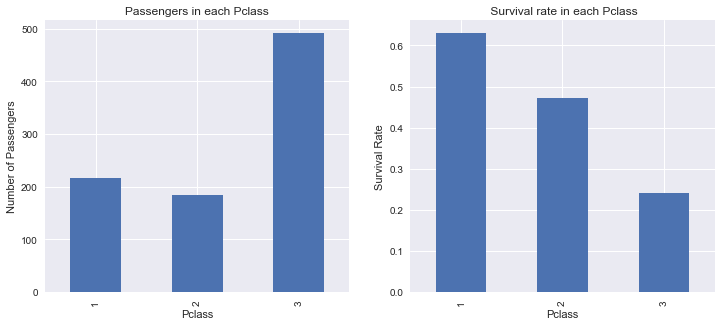

In [30]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
titanic_pd.groupby('Pclass')['Survived'].count().plot(kind = 'bar')
plt.ylabel('Number of Passengers')
plt.title('Passengers in each Pclass')
plt.subplot(1, 2, 2)
titanic_pd.groupby('Pclass')['Survived'].mean().plot(kind = 'bar')
plt.ylabel('Survival Rate')
plt.title(' Survival rate in each Pclass')

Conclusion:
1) Age : Children had a better survival rate than adults.
2) Sex : Females had a better survival rate than males.
3) Fare: People who bought expensive tickets had a better survival rate than the people who had cheaper tickets.

Limitations:
1) There are a lot of missing values for age variable in the data. We are doing the analysis removing those 
   observations. So, it is a possibility that the inferences we get by analyzing the data change if we get all the
   values.
2) We did not perform any tests on the data. We cannot say with confidence that the results we are infering
   are coreect or not. We should perform a chi-square independent sample test to verify and certify our results 
   with confidence levels and p-values.
3) The dataset we have does not contain the information for entire set of people traveling in the ship.
   Total number of passengers and crew traveling in the ship were 2224. Since, we don't have the entire set of values
   it is difficult to analyze as there are other values in the groups we are looking into which can change the
   results and eventually our inferences.
